In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing the three datasets

In [3]:
movies = pd.read_csv(r'C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Project\movies.csv', sep="::", header=None, names = ['MovieID', 'Title', 'Genres'], encoding = "latin")

In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv(r'C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Project\ratings.csv',sep="::", header=None,  names = ['UserID','MovieID', 'Rating', 'Timestamp'], encoding = "latin")

In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users = pd.read_csv(r'C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Project\users.csv', sep="::", header=None, names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], encoding = "latin")
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movies.shape, users.shape, ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

# Creatng a new dataset [Master_Data] with the following columns: MovieID Title UserID Age Gender Occupation Rating.

In [9]:
movie_ratings = pd.merge(movies, ratings, on = "MovieID")
display (movie_ratings.head())
display (movie_ratings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [10]:
users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
data = pd.merge(movie_ratings, users, on = "UserID")

display (data.head())
display (data.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

In [12]:
# choosing 10 - 20 K rows for our analysis

# Exploring the datasets using visual representations (graphs or tables):

### 1. User Age Distribution

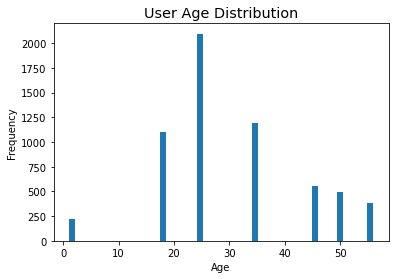

In [13]:
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline

# Visualising age distribution of users
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.show()

### 2. User rating of the movie “Toy Story”

In [14]:
df_movie_toy_story = data[data ['MovieID'] == 1]

In [15]:
df_movie_toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [16]:
toy_story_rating = df_movie_toy_story['Rating'].value_counts()
toy_story_rating

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

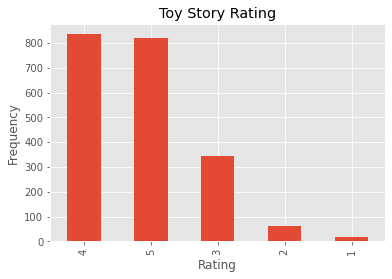

In [17]:
toy_story_rating.plot(kind = 'bar');
plt.title('Toy Story Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [18]:
df_movie_toy_story['Rating'].mean()

4.146846413095811

### 3. Top 25 movies by viewership rating

In [19]:
data_count = data['Title'].value_counts()
data_count[0:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [20]:
titlewise_mean = pd.DataFrame(data.groupby ('Title') ['Rating'].mean())
display(titlewise_mean.head())

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [21]:
top_25 = titlewise_mean.sort_values('Rating', ascending = False).head(25)
top_25

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


<Figure size 576x432 with 0 Axes>

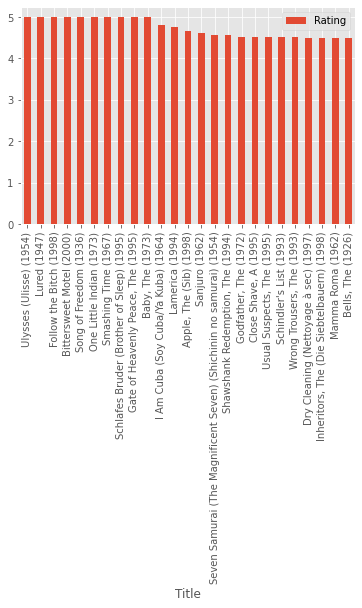

In [22]:
plt.figure(figsize=(8,6))
top_25.plot(kind = 'bar')
plt.show()

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [23]:
data_of_2696 = data[data['UserID']==2696]
data_of_2696.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


In [24]:
data_of_2696.count()

MovieID       20
Title         20
Genres        20
UserID        20
Rating        20
Timestamp     20
Gender        20
Age           20
Occupation    20
Zip-Code      20
dtype: int64

In [25]:
plot_for_2696 = data_of_2696.pivot_table(('Rating'), index='Title')

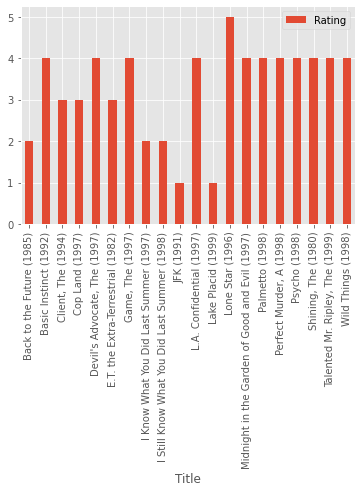

<Figure size 1080x576 with 0 Axes>

In [26]:
plot_for_2696.plot(kind = 'bar')
plt.figure(figsize=(15,8))
plt.show()


# Feature Engineering:

### 1. Using column genres: Finding out all the unique genres:

In [27]:
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [28]:
data.Genres = data.Genres.str.split("|")
data.Genres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [29]:
data.shape

(1000209, 10)

In [30]:
data5K = data[:5000]

In [31]:
x = []
for rn in range(len(data5K)):
    x = x + data5K.Genres[rn]

In [32]:
data5K.Genres

0                 [Animation, Children's, Comedy]
1       [Animation, Children's, Musical, Romance]
2                                         [Drama]
3            [Action, Adventure, Fantasy, Sci-Fi]
4                                    [Drama, War]
                          ...                    
4995                                    [Musical]
4996                            [Comedy, Musical]
4997                            [Comedy, Musical]
4998                                    [Musical]
4999                            [Comedy, Romance]
Name: Genres, Length: 5000, dtype: object

In [33]:
print(x)

['Animation', "Children's", 'Comedy', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Drama', 'War', "Children's", 'Drama', 'Animation', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Animation', "Children's", 'Musical', 'Crime', 'Drama', 'Thriller', 'Animation', "Children's", 'Musical', 'Animation', 'Animation', 'Comedy', 'Thriller', 'Animation', "Children's", 'Musical', 'Musical', 'Romance', 'Adventure', "Children's", 'Drama', 'Musical', 'Musical', 'Animation', "Children's", 'Musical', "Children's", 'Comedy', 'Musical', 'Animation', "Children's", 'Musical', 'Musical', "Children's", 'Drama', 'Fantasy', 'Sci-Fi', 'Drama', 'Action', 'Adventure', 'Comedy', 'Romance', 'Drama', 'Drama', 'Comedy', 'Sci-Fi', 'Action', 'Adventure', 'Drama', 'Drama', 'Adventure', 'Animation', "Children's", 'Comedy', 'Musical', 'Drama', 'Romance', 'Drama', 'Animation', "Children's", 'Drama', 'Drama', 'Animation', "Children's", 'Ac

In [34]:
unique_genres = list(set(x))
print(unique_genres)

['Comedy', 'Drama', 'Crime', 'Action', 'Fantasy', 'Adventure', 'Musical', 'War', "Children's", 'Animation', 'Western', 'Horror', 'Mystery', 'Documentary', 'Sci-Fi', 'Film-Noir', 'Romance', 'Thriller']


In [35]:
len(unique_genres)

18

### 2. Creating a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [36]:
unique_genres = pd.Series(unique_genres)
unique_genres

0          Comedy
1           Drama
2           Crime
3          Action
4         Fantasy
5       Adventure
6         Musical
7             War
8      Children's
9       Animation
10        Western
11         Horror
12        Mystery
13    Documentary
14         Sci-Fi
15      Film-Noir
16        Romance
17       Thriller
dtype: object

<AxesSubplot:>

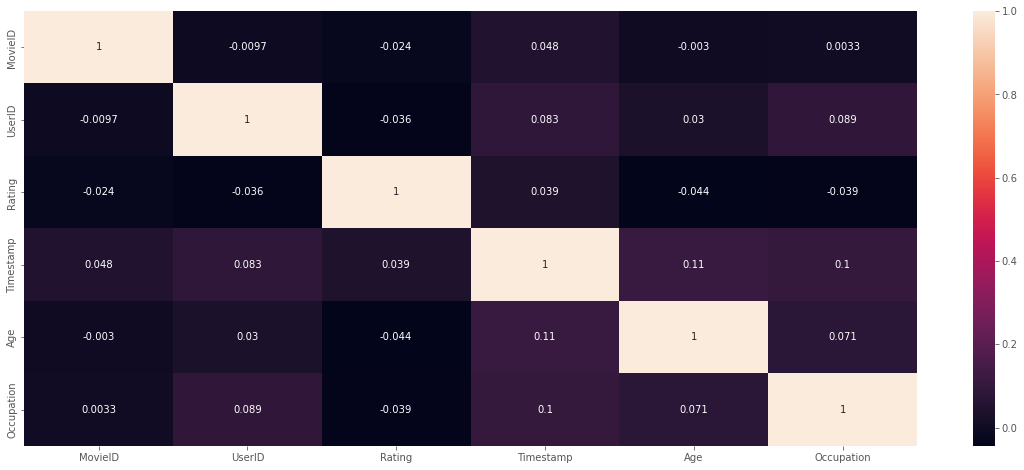

In [37]:
df = data[:5000]
data5K.head()

import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20,8))
corr = data5K.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})


### 4.	Develop an appropriate model to predict the movie ratings

In [38]:
viewership = pd.merge(ratings, users, how='left', left_on=['UserID'], right_on=['UserID'])

In [39]:
viewership.shape

(1000209, 8)

In [57]:
few_viewership = viewership.head(500)
few_viewership.shape

(500, 8)

In [58]:
few_viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [59]:
# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [61]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [62]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

In [63]:
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [64]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,2,130
1,0,2,78
2,0,2,95
3,0,2,374
4,0,2,280


In [65]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [69]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
lr = linReg.fit(x_train, y_train)

In [70]:
result = linReg.predict(x_test)

In [72]:
from sklearn.metrics import r2_score

In [75]:
print(
    'r2 value: ',r2_score(y_test, result)
)

r2 value:  0.007598314484191349
